In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from collections import deque
from graphviz import Digraph

In [2]:
# Get the button and input and output fields
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service)
url = "https://pages.cs.wisc.edu/~yw/CS320F23TH1.html"
driver.get(url)
print("DONE")

DONE


In [3]:
# Get the links on the page
def get_links():
    links = driver.find_elements("tag name", "a")
    pages = list(filter(lambda x : x.text == "Link", links))
    hrefs = list(map(lambda x : x.get_attribute("href"), pages))
    return hrefs

get_links()

['https://pages.cs.wisc.edu/~yw/CS320F23TH2.html',
 'https://pages.cs.wisc.edu/~yw/CS320F23TH3.html',
 'https://pages.cs.wisc.edu/~yw/CS320F23TH4.html']

In [4]:
# Get the name of the page
def page_name(link):
    start = link.index("TH") + 2
    end = link.index(".html")
    if start >= 0 and end >= 0:
        return link[start:end]
    return ""

page_name(url)

'1'

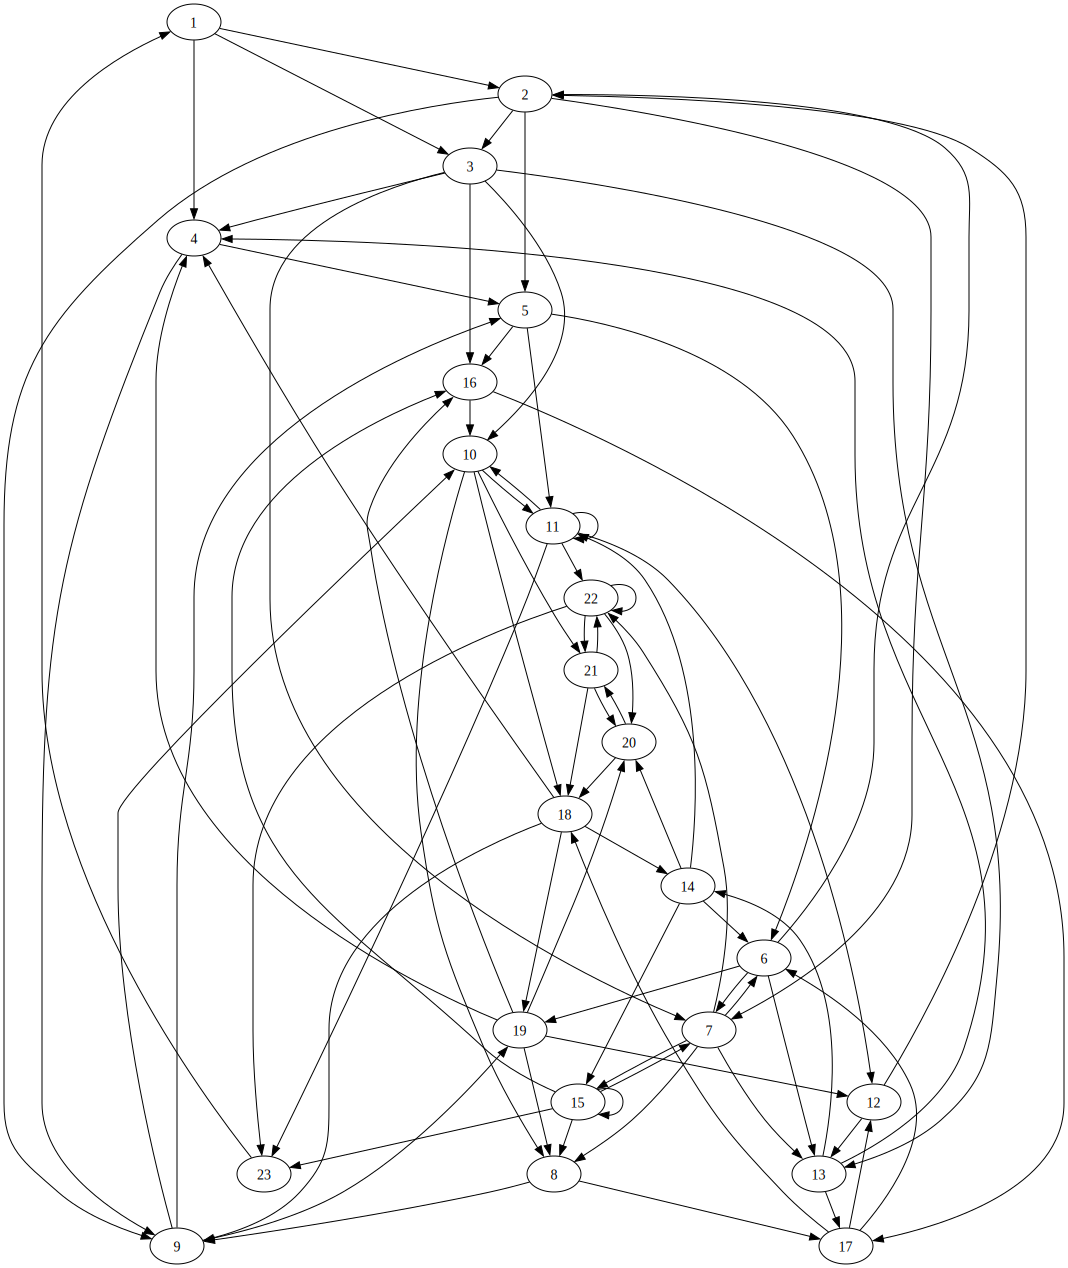

In [5]:
# BFS to search for all pages
def crawl(url):
    visited = set()
    queue = deque([url])
    graph = Digraph()
    count = 0 # avoid infinite loop
    while count < 30:
        count = count + 1
        current = queue.popleft()
        visited.add(current)
        driver.get(current)
        graph.node(page_name(current))
        links = get_links()
        for link in links:
            graph.edge(page_name(current), page_name(link))
            if not link in visited and not link in queue:
                queue.append(link)
        if len(queue) == 0:
            break
    return graph

url = "https://pages.cs.wisc.edu/~yw/CS320F23TH1.html"
crawl(url)

In [6]:
# Remember to quit when it's done
driver.quit()